# Clone the repo

In [1]:
# # Clone the entire repo.
# !git clone -b master --single-branch https://github.com/NewLuminous/Zalo-Vietnamese-Wiki-QA.git zaloqa
# %cd zaloqa

# Install & load libraries

In [30]:
import modeling
import evaluation
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [31]:
# To reload a module while in the interactive mode
import importlib
importlib.reload(modeling)

<module 'modeling' from '/home/quocan/PycharmProjects/Zalo-Vietnamese-Wiki-QA/modeling/__init__.py'>

# Load data

In [32]:
from utils import data_loading

zalo_data = data_loading.load(['zaloai'])
zalo_data

,question,text,label
0,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2013 , Nguyễn Quang Hải giành chức vô địch...",True
1,Quang Hải giành được chức vô địch U21 quốc gia...,"Sau chức vô địch U-21 quốc gia 2013 , Nguyễn Q...",True
2,Quang Hải giành được chức vô địch U21 quốc gia...,Anh bắt đầu gia nhập lò đào tạo trẻ Hà Nội T&T...,False
3,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2011 , Nguyễn Quang Hải mới 14 tuổi được g...",False
4,Mỗi hiệp bóng đá kéo dài bao lâu,Một trận đấu bóng đá thông thường có hai hiệp ...,True
...,...,...,...
18103,Thành phố nào là thủ đô của Costa Rica,San José (tiếng Tây Ban Nha: San José; ) là th...,True
18104,Thành phố nào là thủ đô của Costa Rica,Vì Costa Rica có địa hình đa dạng nhiều núi no...,True
18105,Thành phố nào là thủ đô của Costa Rica,"Với địa vị là thủ đô, San José là nơi đặt trụ ...",True
18106,Thành phố nào là thủ đô của Costa Rica,Santa Teresa là một thị xã nhỏ ở tỉnh Puntaren...,True


# Train & evaluate

In [33]:
from sklearn.model_selection import train_test_split

X = zalo_data.drop(columns=['label'])
y = zalo_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

## LogisticRegression + CountVectorizer

In [22]:
model = modeling.get_model('logit')(vectorizer='bow-ngram', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
print('Accuracy:', evaluation.get_accuracy(y_test, y_pred))
evaluation.print_classification_report(y_test, y_pred)

Accuracy: 0.6234124792932082
Classification report:
               precision    recall  f1-score   support

       False       0.73      0.70      0.72      1234
        True       0.42      0.46      0.44       577

    accuracy                           0.62      1811
   macro avg       0.58      0.58      0.58      1811
weighted avg       0.63      0.62      0.63      1811



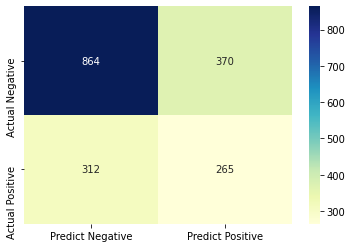

In [7]:
evaluation.plot_confusion_matrix(y_test, y_pred)

## LogisticRegression + TfidfVectorizer

In [8]:
model = modeling.get_model('logit')(vectorizer='tfidf', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
print('Accuracy:', evaluation.get_accuracy(y_test, y_pred))
evaluation.print_classification_report(y_test, y_pred)

Accuracy: 0.620651573716179
Classification report:
               precision    recall  f1-score   support

       False       0.72      0.72      0.72      1234
        True       0.41      0.41      0.41       577

    accuracy                           0.62      1811
   macro avg       0.56      0.57      0.56      1811
weighted avg       0.62      0.62      0.62      1811



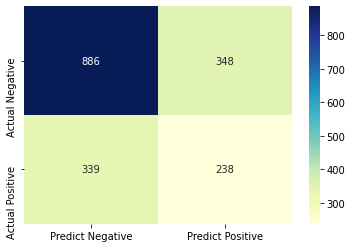

In [10]:
evaluation.plot_confusion_matrix(y_test, y_pred)

## LogisticRegression + Keras's Embedding

In [5]:
model = modeling.get_model('logit-embedding')()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 40, 64)       1920000     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 500, 64)      1920000     input_2[0][0]                    
_______________________________________________________________________________________

In [6]:
print('Accuracy:', evaluation.get_accuracy(y_test, y_pred))
evaluation.print_classification_report(y_test, y_pred)

Accuracy: 0.6570955273329652
Classification report:
               precision    recall  f1-score   support

       False       0.70      0.87      0.78      1234
        True       0.42      0.20      0.27       577

    accuracy                           0.66      1811
   macro avg       0.56      0.54      0.52      1811
weighted avg       0.61      0.66      0.62      1811



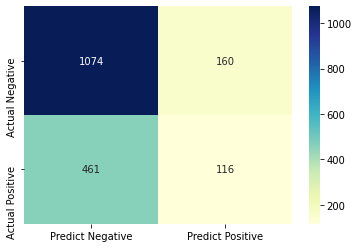

In [7]:
evaluation.plot_confusion_matrix(y_test, y_pred)

## LogisticRegression + Word2Vec

In [4]:
model = modeling.get_model('logit')(vectorizer='word2vec', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [5]:
print('Accuracy:', evaluation.get_accuracy(y_test, y_pred))
evaluation.print_classification_report(y_test, y_pred)

Accuracy: 0.6515737161789067
Classification report:
               precision    recall  f1-score   support

       False       0.74      0.74      0.74      1234
        True       0.45      0.45      0.45       577

    accuracy                           0.65      1811
   macro avg       0.60      0.60      0.60      1811
weighted avg       0.65      0.65      0.65      1811



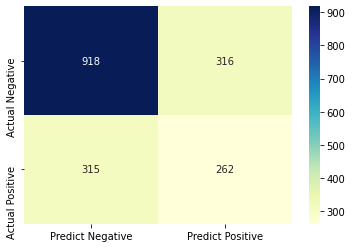

In [6]:
evaluation.plot_confusion_matrix(y_test, y_pred)

## CRNN

In [12]:
model = modeling.get_model('crnn')()
model.fit(X_train, y_train)

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, 50)]   0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, None, 400)    100400      input_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, None, 50)]   0                                            
__________________________________________________________________________________________________
max_pooling1d_3 (MaxPooling1D)  (None, None, 400)    0           conv1d_3[0][0]                   
_______________________________________________________________________________________

In [13]:
y_pred = model.predict(X_test)

In [14]:
print('Accuracy:', evaluation.get_accuracy(y_test, y_pred))
evaluation.print_classification_report(y_test, y_pred)

Accuracy: 0.6212037548315847
Classification report:
               precision    recall  f1-score   support

       False       0.67      0.86      0.76      1234
        True       0.26      0.10      0.15       577

    accuracy                           0.62      1811
   macro avg       0.47      0.48      0.45      1811
weighted avg       0.54      0.62      0.56      1811



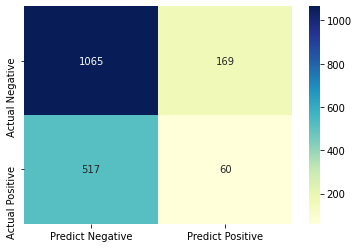

In [15]:
evaluation.plot_confusion_matrix(y_test, y_pred)

## CRNN + Attention

In [5]:
model = modeling.get_model('crnn-attention')()
model.fit(X_train, y_train)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, 50)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, None, 128)    32128       input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, None, 128)    0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, None, 128)    82048       max_pooling1d[0][0]              
_______________________________________________________________________________________

In [6]:
y_pred = model.predict(X_test)

In [7]:
print('Accuracy:', evaluation.get_accuracy(y_test, y_pred))
evaluation.print_classification_report(y_test, y_pred)

Accuracy: 0.49088901159580345
Classification report:
               precision    recall  f1-score   support

       False       0.66      0.53      0.59      1234
        True       0.29      0.41      0.34       577

    accuracy                           0.49      1811
   macro avg       0.47      0.47      0.46      1811
weighted avg       0.54      0.49      0.51      1811



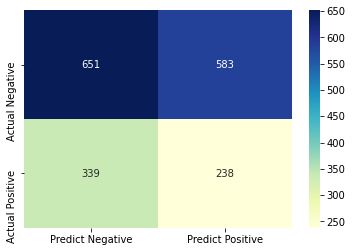

In [8]:
evaluation.plot_confusion_matrix(y_test, y_pred)

# Navie Bayes + CountVectorizer

In [27]:
model = modeling.get_model('navie-bayes')(vectorizer='bow-ngram')

In [34]:
model.fit(X_train, y_train)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [24]:
y_pred = model.predict(X_test)

In [25]:
print('Accuracy:', evaluation.get_accuracy(y_test, y_pred))
evaluation.print_classification_report(y_test, y_pred)

Accuracy: 0.7161789066813915
Classification report:
               precision    recall  f1-score   support

       False       0.78      0.81      0.79      1234
        True       0.56      0.52      0.54       577

    accuracy                           0.72      1811
   macro avg       0.67      0.66      0.67      1811
weighted avg       0.71      0.72      0.71      1811



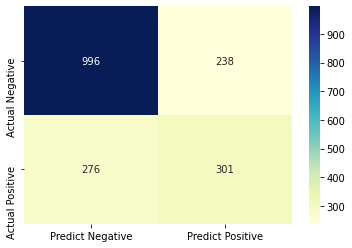

In [26]:
evaluation.plot_confusion_matrix(y_test, y_pred)